In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sales=pd.read_csv('data_set/kc_house_data.csv')
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## 1 .
Write your own function called ‘polynomial_sframe’ (or otherwise) which accepts an array ‘feature’ and a maximal ‘degree’ and returns an data frame  with the first column equal to ‘feature’ and the remaining columns equal to ‘feature’ to increasing integer powers up to ‘degree’.

In [1]:
def polynomail_dataframe(feature,degree):
    poly_dframe=pd.DataFrame()
    poly_dframe['power_1']=feature
    if degree >1:
        for power in range(2,degree+1):
            name='power_'+str(power)
            poly_dframe[name]=feature.apply(lambda x : x ** power)
    
    return poly_dframe

## 2.
  For the remainder of the assignment we will be working with the house Sales data as in the previous notebooks. Load in the data and also sort the sales SFrame by ‘sqft_living’. When we plot the fitted values we want to join them up in a line and this works best if the variable on the X-axis (which will be ‘sqft_living’) is sorted. For houses with identical square footage, we break the tie by their prices.

In [4]:
sales=sales.sort_values(['sqft_living','price'])
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,20140926T000000,142000.0,0,0.00,290,20875,1.0,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850
15381,2856101479,20140701T000000,276000.0,1,0.75,370,1801,1.0,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340,5000
860,1723049033,20140620T000000,245000.0,1,0.75,380,15000,1.0,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170,15000
18379,1222029077,20141029T000000,265000.0,0,0.75,384,213444,1.0,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920,224341
4868,6896300380,20141002T000000,228000.0,0,1.00,390,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000


## 3.
 Make a 1 degree polynomial SFrame with sales[‘sqft_living’] as the the feature. Call it ‘poly1_data’. Add sales[‘price’] to poly1_data as this will be our output variable. 

In [5]:
poly1_data=polynomail_dataframe(sales['sqft_living'],1)
poly1_data.head()

,power_1
19452,290
15381,370
860,380
18379,384
4868,390


In [6]:
poly1_data['price']=sales.price
poly1_data.head()

,power_1,price
19452,290,142000.0
15381,370,276000.0
860,380,245000.0
18379,384,265000.0
4868,390,228000.0


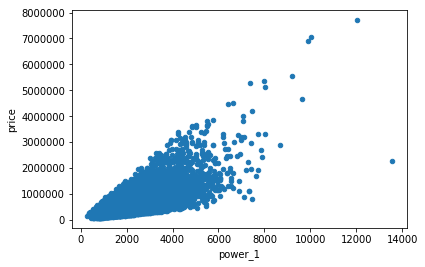

In [9]:
poly1_data.plot(x='power_1',y='price',kind='scatter')

## 4.
Use graphlab.linear_regression.create (or another linear regression library) to compute the regression weights for predicting sales[‘price’] based on the 1 degree polynomial feature ‘sqft_living’. The result should be an intercept and slope.

In [10]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()

In [11]:
x=np.array(poly1_data.power_1).reshape(-1,1)
y=np.array(poly1_data.price).reshape(-1,1)

In [12]:
model1.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

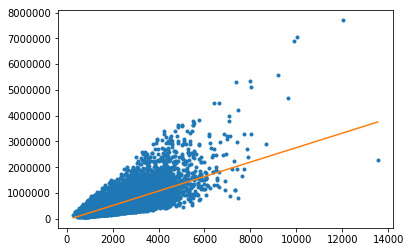

In [13]:
plt.plot(poly1_data['power_1'],poly1_data['price'],'.',
        poly1_data['power_1'],model1.predict(x),'-')

In [14]:
# intercepts and slopes
model1.intercept_,model1.coef_

(array([-43580.74309447]), array([[280.6235679]]))

## 5.
 Now that you have plotted the results using a 1st degree polynomial, try it again using a 2nd degree and 3rd degree polynomial. Look at the fitted lines, do they appear as you would expect?

In [15]:
poly2_data=polynomail_dataframe(sales['sqft_living'],degree=2)

In [16]:
model2=LinearRegression()

In [17]:
x2=np.array(poly2_data).reshape(-1,2)
y2=np.array(sales['price']).reshape(-1,1)
x2.shape,y2.shape

((21613, 2), (21613, 1))

In [18]:
model2.fit(x2,y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

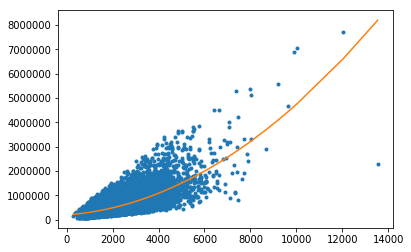

In [19]:
plt.plot(poly2_data['power_1'],sales['price'],'.',
        poly2_data['power_1'],model2.predict(x2),'-')

In [20]:
model2.intercept_, model2.coef_

(array([199222.27930548]), array([[6.79940947e+01, 3.85812609e-02]]))

### Degree 3 polynomial

In [21]:
poly3_data=polynomail_dataframe(sales['sqft_living'],degree=3)
poly3_data.head()

,power_1,power_2,power_3
19452,290,84100,24389000
15381,370,136900,50653000
860,380,144400,54872000
18379,384,147456,56623104
4868,390,152100,59319000


In [22]:
x3=np.array(poly3_data).reshape(-1,3)
y3=np.array(sales['price'])

In [23]:
model3=LinearRegression()
model3.fit(x3,y3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

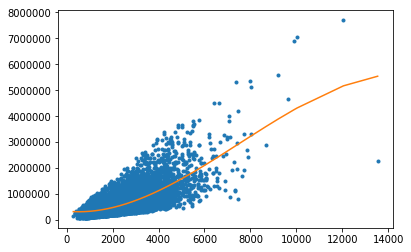

In [24]:
plt.plot(poly3_data['power_1'],sales['price'],'.',
        poly3_data['power_1'],model3.predict(x3),'-')

In [25]:
model3.intercept_,model3.coef_

(336819.7482214633, array([-9.01819864e+01,  8.70465089e-02, -3.84055260e-06]))

### Degree 15

In [26]:
poly15_data=polynomail_dataframe(sales['sqft_living'],degree=15)
poly15_data.head()

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15
19452,290,84100,24389000,7072810000,2051114900000,594823321000000,172498763090000000,50024641296100000000,14507145975869000000000,4207072333002010000000000,1220050976570582900000000000,353814783205469041000000000000,102606287129586021890000000000000,29755823267579946348100000000000000,8629188747598184440949000000000000000
15381,370,136900,50653000,18741610000,6934395700000,2565726409000000,949318771330000000,351247945392100000000,129961739795077000000000,48085843724178490000000000,17791762177946041300000000000,6582952005840035281000000000000,2435692242160813053970000000000000,901206129599500829968900000000000000,333446267951815307088493000000000000000
860,380,144400,54872000,20851360000,7923516800000,3010936384000000,1144155825920000000,434779213849600000000,165216101262848000000000,62782118479882240000000000,23857205022355251200000000000,9065737908494995456000000000000,3444980405228098273280000000000000,1309092553986677343846400000000000000,497455170514937390661632000000000000000
18379,384,147456,56623104,21743271936,8349416423424,3206175906594816,1231171548132409344,472769874482845188096,181543631801412552228864,69712754611742420055883776,26769697770909089301459369984,10279563944029090291760398073856,3947352554507170672035992860360704,1515783380930753538061821258378510336,582060818277409358615739363217347969024
4868,390,152100,59319000,23134410000,9022419900000,3518743761000000,1372310066790000000,535200926048100000000,208728361158759000000000,81404060851916010000000000,31747583732247243900000000000,12381557655576425121000000000000,4828807485674805797190000000000000,1883234919413174260904100000000000000,734461618571137961752599000000000000000


In [27]:
x15=np.array(poly15_data).reshape(-1,15)

In [28]:
model15=LinearRegression()

In [29]:
model15.fit(x15,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

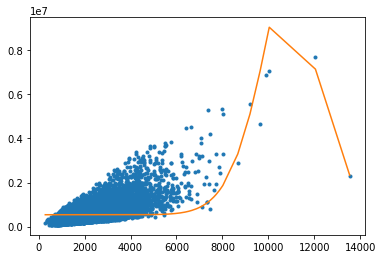

In [30]:
plt.plot(poly3_data['power_1'],sales['price'],'.',
        poly3_data['power_1'],model15.predict(x15),'-')

In [31]:
model15.intercept_,model15.coef_

(array([537116.3296377]),
 array([[ 4.56404164e-91,  6.91713460e-51, -5.84668089e-56,
          2.78197775e-88,  1.19863929e-74,  2.68575522e-71,
          2.26147568e-67,  1.85900299e-63,  1.47144116e-59,
          1.09771012e-55,  7.43509038e-52,  4.23015578e-48,
          1.61618577e-44, -2.49283826e-48,  9.59718336e-53]]))

## 6. 
Estimate a 15th degree polynomial on all 4 sets, plot the results and view the coefficients for all four models.

In [32]:
set_1=pd.read_csv('data_set/wk3_kc_house_set_1_data.csv')
set_2=pd.read_csv('data_set/wk3_kc_house_set_2_data.csv')
set_3=pd.read_csv('data_set/wk3_kc_house_set_3_data.csv')
set_4=pd.read_csv('data_set/wk3_kc_house_set_4_data.csv')

In [33]:
# Create poluy15 sets with testsets
def polynomial15_sets(set_data,set_no):
    data_name=polynomail_dataframe(set_data['sqft_living'],degree=15)
    x_test=np.array(data_name).reshape(-1,15)
    y_test=np.array(set_data['price'])
    return data_name,x_test,y_test

In [57]:
#plots the curve and prints the intercept and the slope
def plot_intercept_slope(model,poly,x,y):
    plt.plot(poly['power_1'],y,'.',
        poly['power_1'],model.predict(x),'-')
    plt.show()
    return model.intercept_,model.coef_

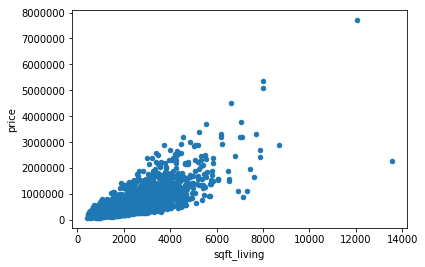

In [35]:
set_1.plot(x='sqft_living',y='price',kind='scatter')

In [36]:
poly15_1,x15_1,y15_1=polynomial15_sets(set_1,1)

In [37]:
model15_1=LinearRegression()

In [38]:
model15_1.fit(x15_1,y15_1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

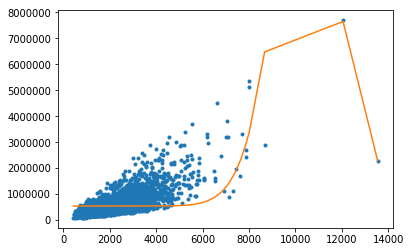

(539058.8186679217,
 array([ 3.05794168e-90, -1.69394947e-49, -5.61767568e-55, -4.97841222e-60,
         3.23082736e-74,  1.10358333e-70,  8.37724029e-67,  6.23411957e-63,
         4.49156442e-59,  3.06938763e-55,  1.91749300e-51,  1.01335180e-47,
         3.62176959e-44, -5.63501661e-48,  2.18641116e-52]))

In [58]:
plot_intercept_slope(model15_1,poly15_1,x15_1,y15_1)

### Set 2

In [40]:
poly15_2,x15_2,y15_2=polynomial15_sets(set_2,2)

In [41]:
model15_2=LinearRegression()
model15_2.fit(x15_2,y15_2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

(506856.1316205913,
 array([ 2.71335949e-77,  7.33541090e-39, -1.85014814e-44,  8.44628222e-50,
         5.73786179e-71,  1.51934987e-58,  3.64549616e-55,  1.50416258e-51,
         5.76015665e-48,  1.95770497e-44,  5.39396539e-41,  9.40376360e-38,
        -3.63529141e-41,  4.65476524e-45, -1.97199121e-49]))

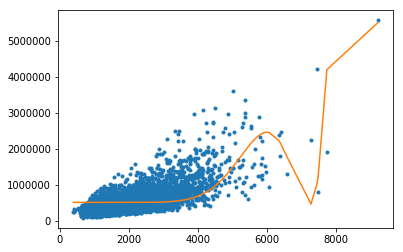

In [42]:
plot_intercept_slope(model15_2,poly15_2,x15_2,y15_2)

### Set 3

In [43]:
poly15_3,x15_3,y15_3=polynomial15_sets(set_3,3)

In [44]:
model15_3=LinearRegression()
model15_3.fit(x15_3,y15_3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

(530874.3166533422,
 array([ 2.83751934e-88, -7.80224128e-49, -1.38770849e-55, -3.98272978e-59,
         1.57170169e-72,  4.27894908e-69,  2.68009626e-65,  1.63911362e-61,
         9.66435015e-58,  5.38044653e-54,  2.72563636e-50,  1.16253248e-46,
         3.33756141e-43, -6.76238818e-47,  3.43132932e-51]))

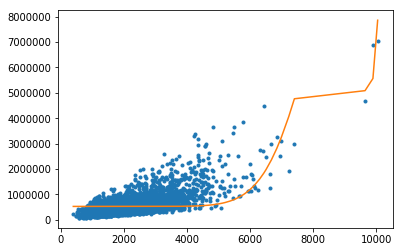

In [45]:
plot_intercept_slope(model15_3,poly15_3,x15_3,y15_3)

### Set 4

In [46]:
poly15_4,x15_4,y15_4=polynomial15_sets(set_4,4)

In [47]:
model15_4=LinearRegression()
model15_4.fit(x15_4,y15_4)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

(494819.18487209524,
 array([ 1.37116050e-76,  2.79678221e-40, -2.13063863e-44, -2.19910713e-49,
         2.58420337e-70,  5.29002498e-58,  1.27070046e-54,  4.87868972e-51,
         1.73549022e-47,  5.47058320e-44,  1.39587599e-40,  2.25041871e-37,
        -9.43954119e-41,  1.31573060e-44, -6.09163430e-49]))

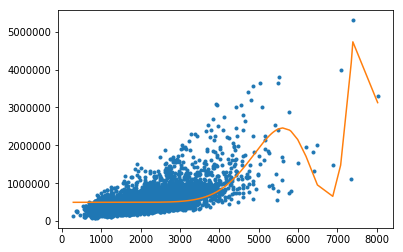

In [48]:
plot_intercept_slope(model15_4,poly15_4,x15_4,y15_4)

## 7. 
Now for each degree from 1 to 15:<br>

1. Build an polynomial data set using training_data[‘sqft_living’] as the feature and the current degree
2. Add training_data[‘price’] as a column to your polynomial data set
3. Learn a model on TRAINING data to predict ‘price’ based on your polynomial data set at the current degree<br>
Compute the RSS on VALIDATION for the current model (print or save the RSS)

In [49]:
training_data=pd.read_csv('data_set/wk3_kc_house_train_data.csv')
validate_data=pd.read_csv('data_set/wk3_kc_house_valid_data.csv')
test_data=pd.read_csv('data_set/wk3_kc_house_test_data.csv')

In [50]:
poly_test_1=polynomail_dataframe(training_data['sqft_living'],1)
y=np.array(training_data['price'])
x=np.array(poly_test_1)
model.fit(x,y)
plt.plot()
rss(predict,y):
    outcome=(predict-y)**2
    outcome=outcome.sum(axis=0)

SyntaxError: invalid syntax (<ipython-input-50-d20b733b600d>, line 6)

In [51]:
# Create polynomial sets sets with testsets
def polynomial_sets(data_set,degree):
    data_name=polynomail_dataframe(data_set['sqft_living'],degree)
    x_test=np.array(data_name).reshape(-1,degree)
    y_test=np.array(data_set['price'])
    return data_name,x_test,y_test

In [52]:
def rss_value(y_pred,y):
    results=(y_pred-y)**2
    results=results.sum(axis=0)
    return results

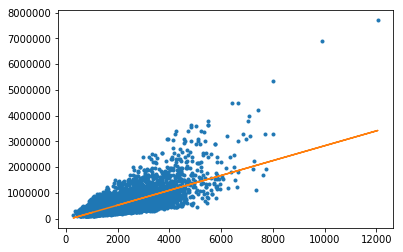

RSS value for 1 model :  [6.29097886e+14]


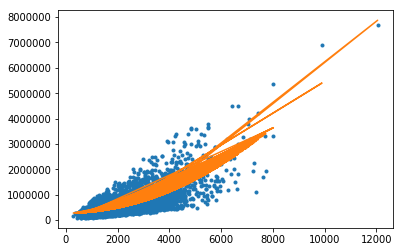

RSS value for 2 model :  [6.23955063e+14]


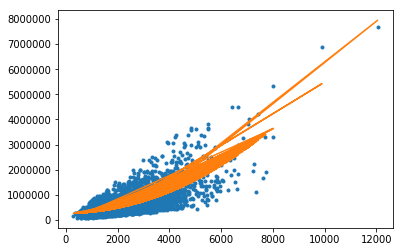

RSS value for 3 model :  [6.2582028e+14]


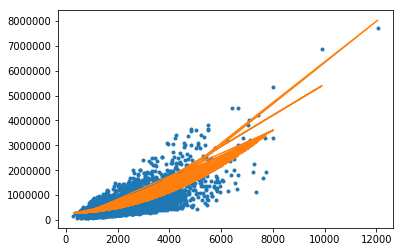

RSS value for 4 model :  [6.29987341e+14]


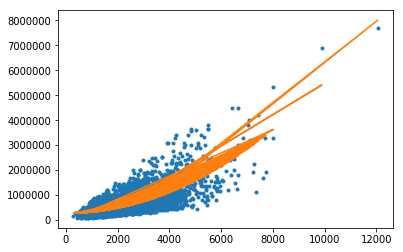

RSS value for 5 model :  [6.28240679e+14]


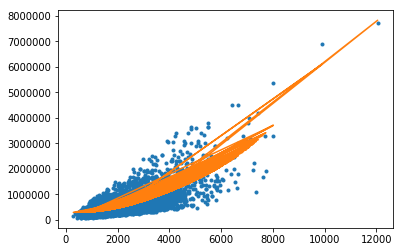

RSS value for 6 model :  [5.66268594e+14]


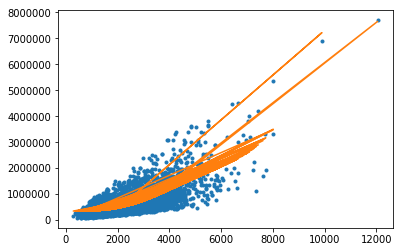

RSS value for 7 model :  [1.07384552e+15]


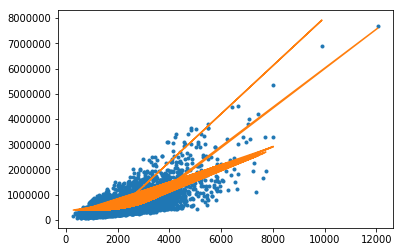

RSS value for 8 model :  [7.08787227e+15]


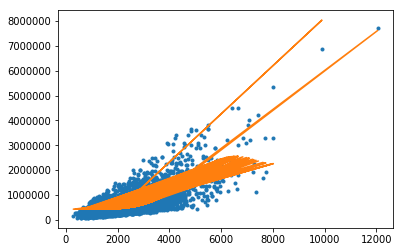

RSS value for 9 model :  [4.53036016e+16]


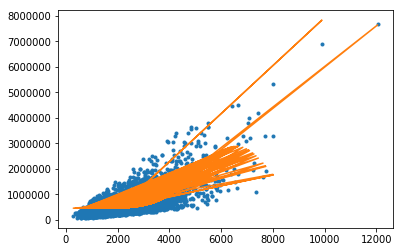

RSS value for 10 model :  [2.47569911e+17]


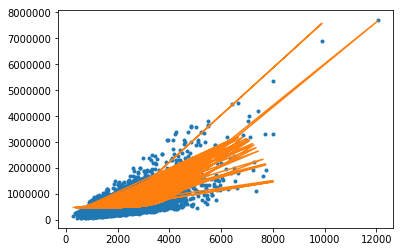

RSS value for 11 model :  [1.19378256e+18]


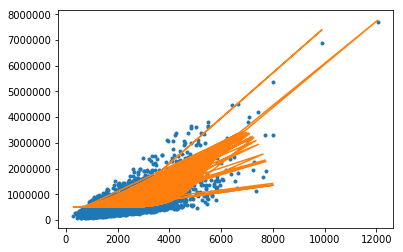

RSS value for 12 model :  [5.09266534e+18]


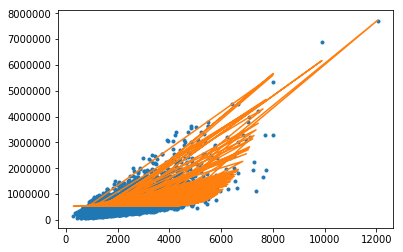

RSS value for 13 model :  [7.61623002e+17]


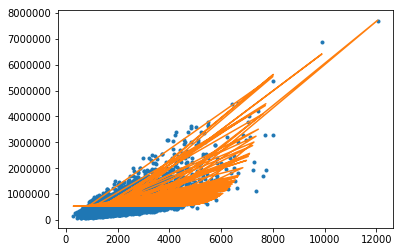

RSS value for 14 model :  [2.29756093e+18]


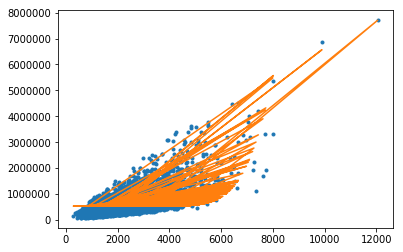

RSS value for 15 model :  [6.9550381e+18]


In [59]:
models=[]
for i in range(1,16):
    polynomial_data,x,y=polynomial_sets(training_data,i)
    test_model=LinearRegression()
    test_model.fit(x,y)
    models.append(test_model)
    plot_intercept_slope(test_model,polynomial_data,x,y)
    ploy_val,x_val,y_val=polynomial_sets(validate_data,i)
    outcomes=np.array(test_model.predict(x_val)).reshape(-1,1)
    y_val=np.array(validate_data['price']).reshape(-1,1)
    rss=rss_value(outcomes,y_val)
    print("RSS value for "+str(i)+" model : ",rss)

### Computing the RSS on test data

In [54]:
poly_test,x_test,y_test=polynomial_sets(test_data,6)

In [55]:
outcomes=models[5].predict(x_test)

In [56]:
rss=rss_value(outcomes,y_test)
rss

135225114656218.81